# Introduction to Network Science
### This notebook explores a network using the NetworkX module.

In [1]:
# import modules
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Initialize a graph from the module
G = nx.karate_club_graph()
type(G)

networkx.classes.graph.Graph

In [3]:
# How big is is?
len(G)

34

In [4]:
# What do the nodes look like?
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

In [5]:
# What does the data for one look like?
list(G.nodes(data=True))[0]

(0, {'club': 'Mr. Hi'})

In [6]:
# What do the edges look like?
G.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])

In [7]:
# Print the number of nodes and links
print(f'Nodes: {len(G.nodes())}, Links: {len(G.edges())}')

Nodes: 34, Links: 78


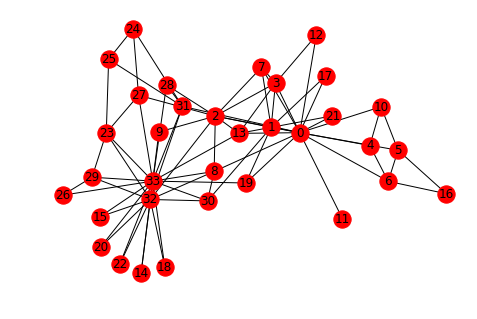

In [10]:
# Visualize the network
nx.draw(G, with_labels=True)
plt.show()

# How are these nodes connected?
How many neighbors does Node 0 have?

In [11]:
# Calculate degree of Node 0
G.degree(0)

16

### Who are those neighbors?

In [13]:
# Show the neighbors
list(G.neighbors(0))

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31]

### Is that a lot? How many do each of the nodes have?

In [14]:
# Calculate the degree distribution
degrees = []
for n in G.nodes():
    degrees.append(G.degree(n))
degrees[:5]

[16, 9, 10, 6, 3]

In [15]:
# List comprehension way
degrees = [G.degree(n) for n in G.nodes()]
degrees[:5]

[16, 9, 10, 6, 3]

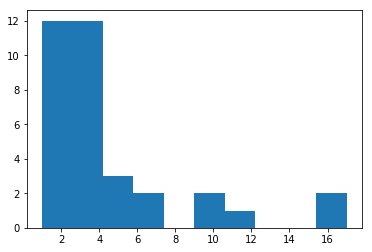

In [16]:
# Visualize the distribution
plt.hist(list(degrees))
plt.show()

### Is there a simpler way to do that?

In [17]:
# Degrees normalized is the degree centrality
deg_cent = nx.degree_centrality(G)
print(f'Node 0 has {G.degree(0)} neighbors and {deg_cent[0]:.2f} degree centrality.')

Node 0 has 16 neighbors and 0.48 degree centrality.


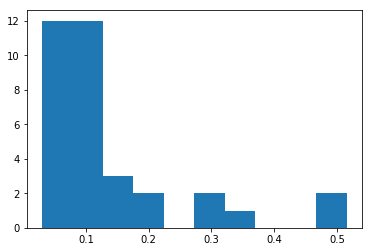

In [18]:
# Replot the distribution
plt.hist(list(deg_cent.values()))
plt.show()

## What's the fastest way to meet someone? (i.e. shortest path)
### How can Node 16 meet Node 33?

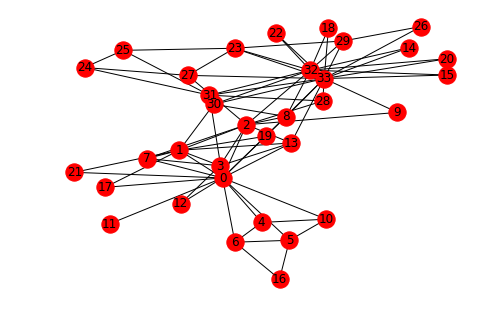

In [19]:
# Show the graph again
nx.draw(G, with_labels=True)
plt.show()

In [20]:
# Are they already connected?
G.has_edge(16, 33)

False

In [21]:
# Calculate shortest path
nx.shortest_path(G, 16, 33)

[16, 5, 0, 8, 33]

### How many other shortest paths are there?

In [22]:
# Compute all shortest paths
len(list(nx.all_shortest_paths(G, 16, 33)))

8

### Who knows the most people? (i.e. Highest Degree)

In [23]:
# Max degree centrality value (or degree)
max(deg_cent.values())

0.5151515151515151

In [24]:
# Max degree node
max(deg_cent, key=deg_cent.get)

33

In [25]:
# Tuple of max degree centrality and node together
max(zip(deg_cent.values(), deg_cent.keys()))

(0.5151515151515151, 33)

In [26]:
# Doesn't work the other way
min(zip(deg_cent.keys(), deg_cent.values()))

(0, 0.48484848484848486)

## Convert nodes to a dataframe for additional analysis
### Note: Be aware that NetworkX 1.0 had the function nx.to_pandas_dataframe() that does not work in NetworkX 2.0

In [31]:
# Convert the node attributes to a pandas dataframe
k_nodes = pd.DataFrame(nx.get_node_attributes(G, 'club').items(), columns=['node', 'club']).set_index('node')
k_nodes.head()

# Add degree centrality
k_nodes['deg_cent'] = deg_cent.values()
k_nodes.head()

,club,deg_cent
node,,
0,Mr. Hi,0.484848
1,Mr. Hi,0.272727
2,Mr. Hi,0.303030
3,Mr. Hi,0.181818
4,Mr. Hi,0.090909


In [32]:
# How many clubs are there?
k_nodes['club'].value_counts()

Mr. Hi     17
Officer    17
Name: club, dtype: int64

In [33]:
# Find the top 5 most popular nodes
k_nodes.sort_values('deg_cent', ascending=False).head()

,club,deg_cent
node,,
33,Officer,0.515152
0,Mr. Hi,0.484848
32,Officer,0.363636
2,Mr. Hi,0.303030
1,Mr. Hi,0.272727
